### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
# import torch

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/Users/macbookair/Desktop/project/kaggle/playground-series-s4e12/train.csv')
test=pd.read_csv('/Users/macbookair/Desktop/project/kaggle/playground-series-s4e12/test.csv')

In [3]:
test.head(2)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment


In [4]:
df.head(4)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0


In [5]:
df.drop('id', axis=1, inplace=True)

In [6]:
df.columns

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

In [7]:
df.shape

(1200000, 20)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1181295.0,41.145563,13.539950,18.000000,30.000000,41.000000,53.000000,64.000000
Annual Income,1155051.0,32745.217777,32179.506124,1.000000,8001.000000,23911.000000,44634.000000,149997.000000
Number of Dependents,1090328.0,2.009934,1.417338,0.000000,1.000000,2.000000,3.000000,4.000000
Health Score,1125924.0,25.613908,12.203462,2.012237,15.918959,24.578648,34.527209,58.975914
Previous Claims,835971.0,1.002689,0.982840,0.000000,0.000000,1.000000,2.000000,9.000000
Vehicle Age,1199994.0,9.569889,5.776189,0.000000,5.000000,10.000000,15.000000,19.000000
Credit Score,1062118.0,592.924350,149.981945,300.000000,468.000000,595.000000,721.000000,849.000000
Insurance Duration,1199999.0,5.018219,2.594331,1.000000,3.000000,5.000000,7.000000,9.000000
Premium Amount,1200000.0,1102.544822,864.998859,20.000000,514.000000,872.000000,1509.000000,4999.000000


In [9]:
df_info={
    'Data Type': df.dtypes,
    'Missing Values(MV)': df.isnull().sum(),
    'MV percentage(%)' : df.isnull().mean() * 100,
    'Unique Values': df.nunique()
}

df_summary = pd.DataFrame(df_info)
df_summary

,Data Type,Missing Values(MV),MV percentage(%),Unique Values
Age,float64,18705,1.558750,47
Gender,object,0,0.000000,2
Annual Income,float64,44949,3.745750,88593
Marital Status,object,18529,1.544083,3
Number of Dependents,float64,109672,9.139333,5
Education Level,object,0,0.000000,4
Occupation,object,358075,29.839583,3
Health Score,float64,74076,6.173000,532655
Location,object,0,0.000000,3
Policy Type,object,0,0.000000,3


In [10]:
missing_rows = df[df.isnull().any(axis=1)]
missing_rows.head(10)

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
5,29.0,Male,45963.0,Married,1.0,Bachelor's,NaN,33.053198,Urban,Premium,2.0,4.0,614.0,5.0,2022-05-20 15:21:39.207847,Average,No,Weekly,House,3202.0
6,41.0,Male,40336.0,Married,0.0,PhD,NaN,NaN,Rural,Basic,2.0,8.0,807.0,6.0,2020-02-21 15:21:39.219432,Poor,No,Weekly,House,439.0
8,21.0,Male,1733.0,Divorced,3.0,Bachelor's,NaN,17.869551,Urban,Premium,1.0,10.0,685.0,8.0,2020-12-14 15:21:39.198406,Average,No,Monthly,Condo,213.0
10,56.0,Female,8054.0,Married,1.0,Bachelor's,Unemployed,NaN,Rural,Premium,1.0,8.0,431.0,8.0,2021-05-12 15:21:39.134960,Average,No,Monthly,Condo,857.0
11,23.0,Male,30983.0,Single,3.0,Master's,NaN,5.813129,Urban,Premium,NaN,6.0,597.0,8.0,2020-03-22 15:21:39.155231,Good,No,Rarely,Condo,1447.0
12,25.0,Female,23706.0,Single,4.0,Master's,Employed,4.090538,Urban,Comprehensive,2.0,19.0,NaN,2.0,2021-10-28 15:21:39.086123,Poor,Yes,Weekly,Apartment,703.0
13,44.0,Female,70893.0,Single,0.0,Bachelor's,NaN,55.896322,Suburban,Premium,0.0,3.0,511.0,6.0,2023-01-20 15:21:39.132191,Good,Yes,Weekly,House,1847.0


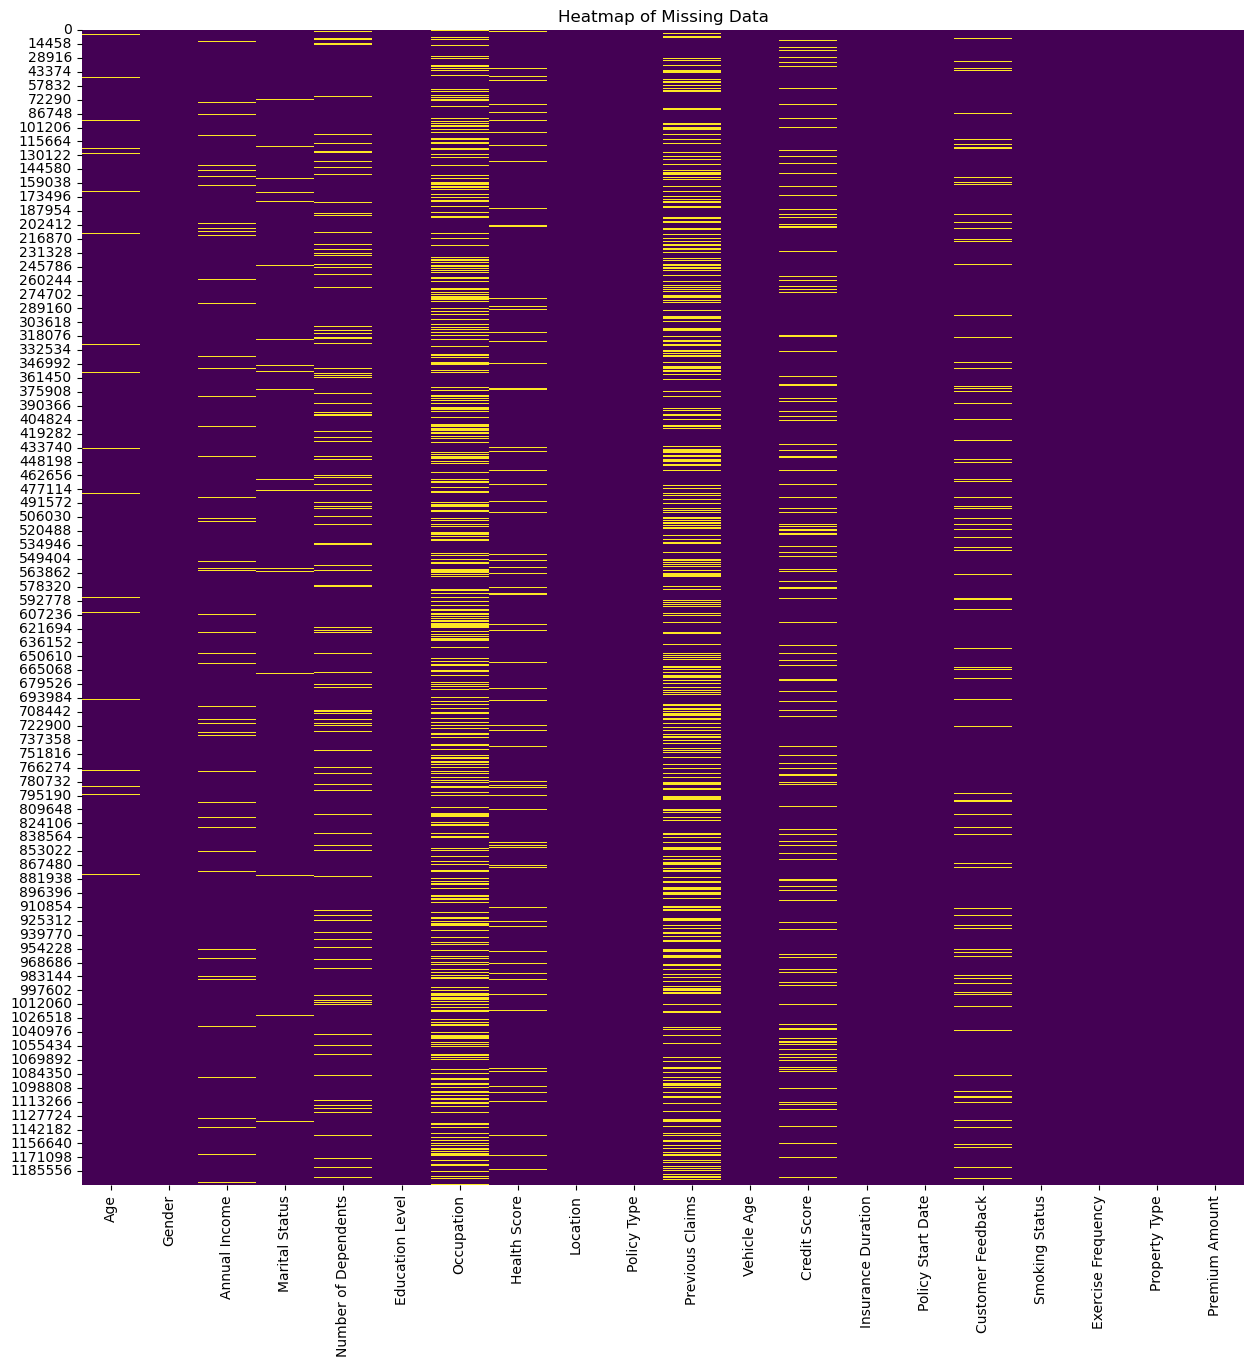

In [11]:
#Visualize missing data
plt.figure(figsize=(15, 15))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Data')
plt.show()

In [12]:
df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'], errors='coerce')
print(df['Policy Start Date'].dtypes)

datetime64[ns]


In [13]:
num_cols = df.select_dtypes(include=['int64', 'float64'])
num_cols

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
0,19.0,10049.0,1.0,22.598761,2.0,17.0,372.0,5.0,2869.0
1,39.0,31678.0,3.0,15.569731,1.0,12.0,694.0,2.0,1483.0
2,23.0,25602.0,3.0,47.177549,1.0,14.0,NaN,3.0,567.0
3,21.0,141855.0,2.0,10.938144,1.0,0.0,367.0,1.0,765.0
4,21.0,39651.0,1.0,20.376094,0.0,8.0,598.0,4.0,2022.0
...,...,...,...,...,...,...,...,...,...
1199995,36.0,27316.0,0.0,13.772907,NaN,5.0,372.0,3.0,1303.0
1199996,54.0,35786.0,NaN,11.483482,NaN,10.0,597.0,4.0,821.0
1199997,19.0,51884.0,0.0,14.724469,0.0,19.0,NaN,6.0,371.0
1199998,55.0,NaN,1.0,18.547381,1.0,7.0,407.0,4.0,596.0


In [14]:
cat_cols = df.select_dtypes(include=['object'])
cat_cols

,Gender,Marital Status,Education Level,Occupation,Location,Policy Type,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,Female,Married,Bachelor's,Self-Employed,Urban,Premium,Poor,No,Weekly,House
1,Female,Divorced,Master's,NaN,Rural,Comprehensive,Average,Yes,Monthly,House
2,Male,Divorced,High School,Self-Employed,Suburban,Premium,Good,Yes,Weekly,House
3,Male,Married,Bachelor's,NaN,Rural,Basic,Poor,Yes,Daily,Apartment
4,Male,Single,Bachelor's,Self-Employed,Rural,Premium,Poor,Yes,Weekly,House
...,...,...,...,...,...,...,...,...,...,...
1199995,Female,Married,Master's,Unemployed,Urban,Premium,Poor,No,Daily,Apartment
1199996,Male,Divorced,Master's,Self-Employed,Rural,Comprehensive,Poor,No,Weekly,Apartment
1199997,Male,Divorced,Master's,NaN,Suburban,Basic,Good,No,Monthly,Condo
1199998,Male,Single,PhD,NaN,Suburban,Premium,Poor,No,Daily,Apartment


In [15]:
date_cols = df.select_dtypes(include=['datetime64'])
date_cols

,Policy Start Date
0,2023-12-23 15:21:39.134960
1,2023-06-12 15:21:39.111551
2,2023-09-30 15:21:39.221386
3,2024-06-12 15:21:39.226954
4,2021-12-01 15:21:39.252145
...,...
1199995,2023-05-03 15:21:39.257696
1199996,2022-09-10 15:21:39.134960
1199997,2021-05-25 15:21:39.106582
1199998,2021-09-19 15:21:39.190215


In [16]:
target_col = df['Premium Amount']
target_col

0          2869.0
1          1483.0
2           567.0
3           765.0
4          2022.0
            ...  
1199995    1303.0
1199996     821.0
1199997     371.0
1199998     596.0
1199999    2480.0
Name: Premium Amount, Length: 1200000, dtype: float64

### Univariate analysis

Skewness of Age: -0.01
Skewness of Annual Income: 1.47
Skewness of Number of Dependents: -0.01
Skewness of Health Score: 0.28
Skewness of Previous Claims: 0.91
Skewness of Vehicle Age: -0.02
Skewness of Credit Score: -0.11
Skewness of Insurance Duration: -0.01
Skewness of Premium Amount: 1.24


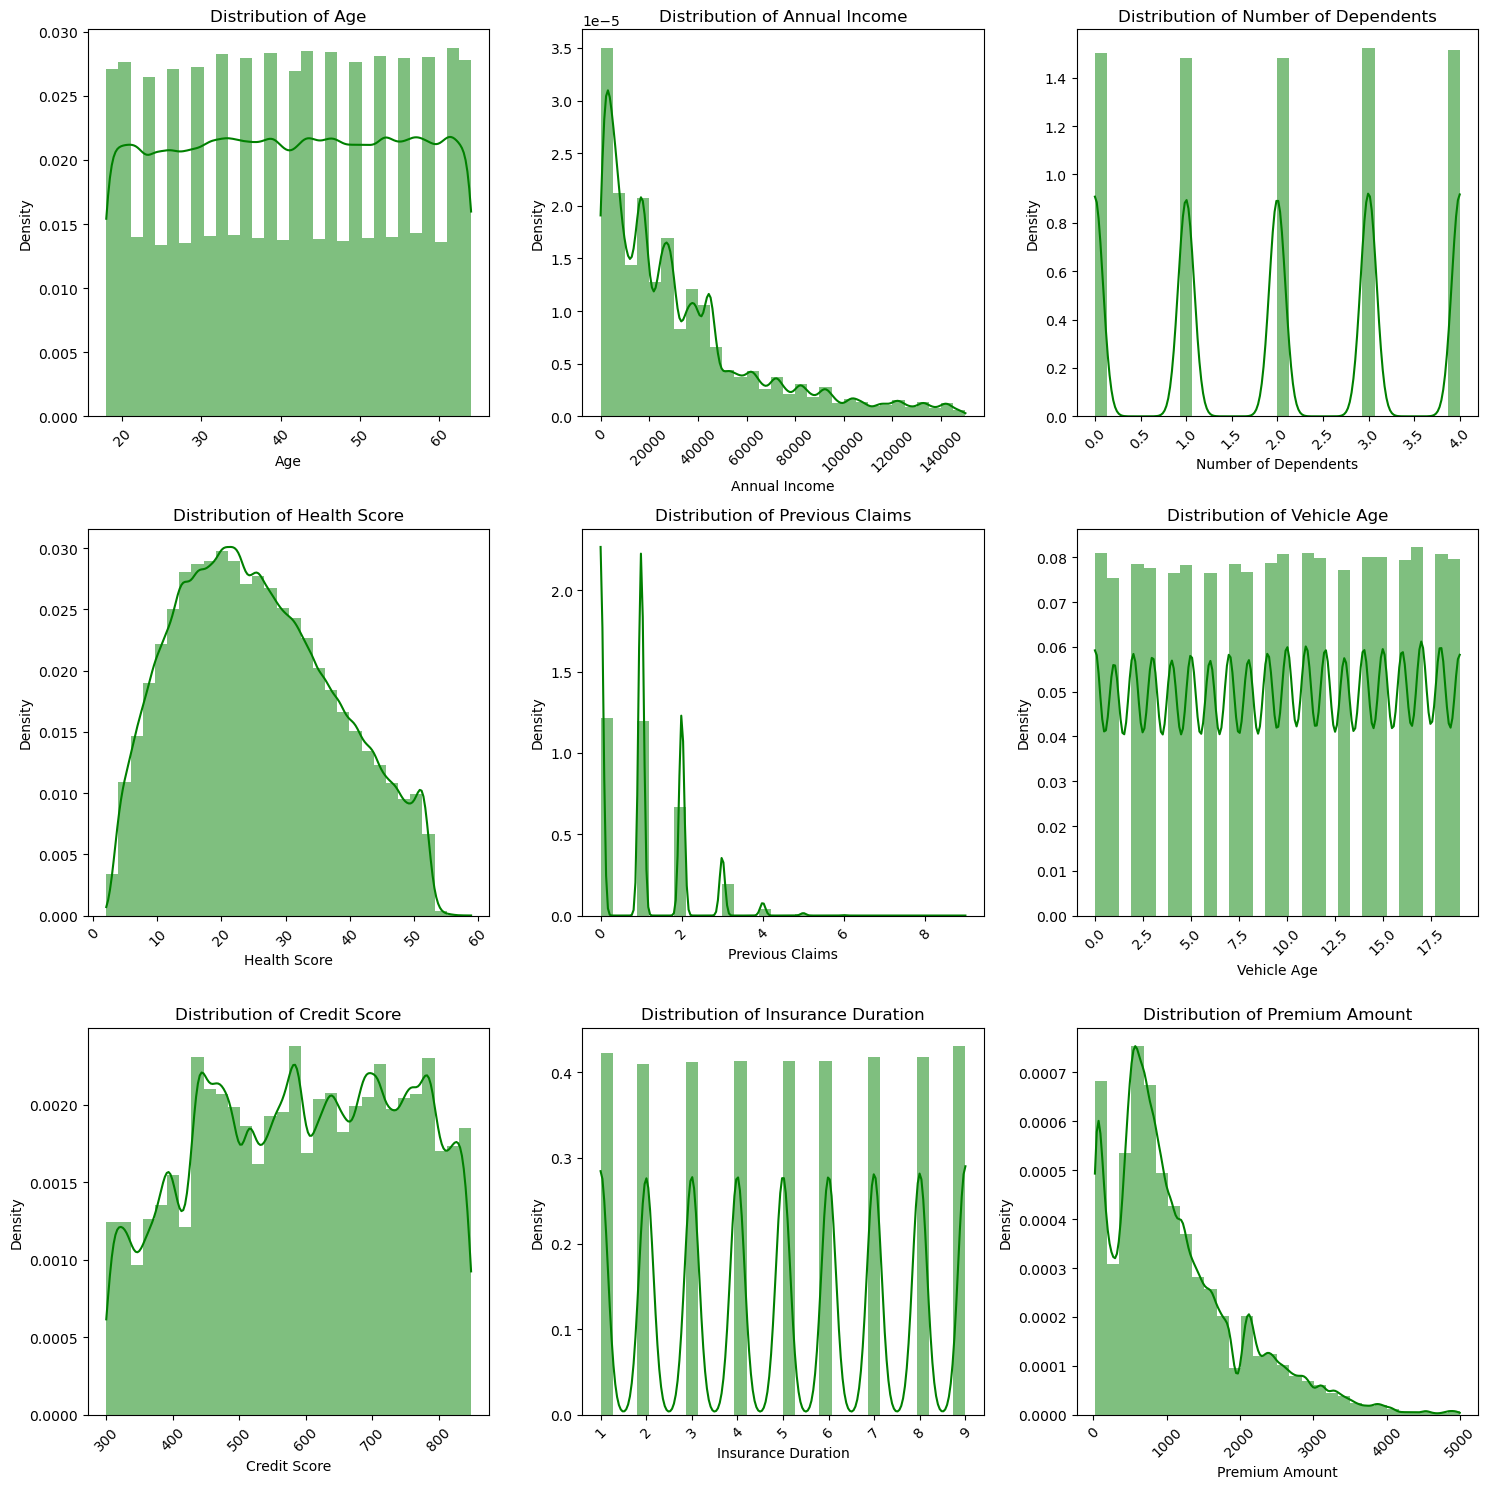

In [17]:
plt.figure(figsize=(15, 15))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)

    sns.histplot(df[col], kde=True, bins=30, color='green', stat='density', linewidth=0)

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.xticks(rotation=45)

    feature_skewness = skew(df[col].dropna())
    print(f"Skewness of {col}: {feature_skewness:.2f}")

plt.tight_layout()
plt.show()

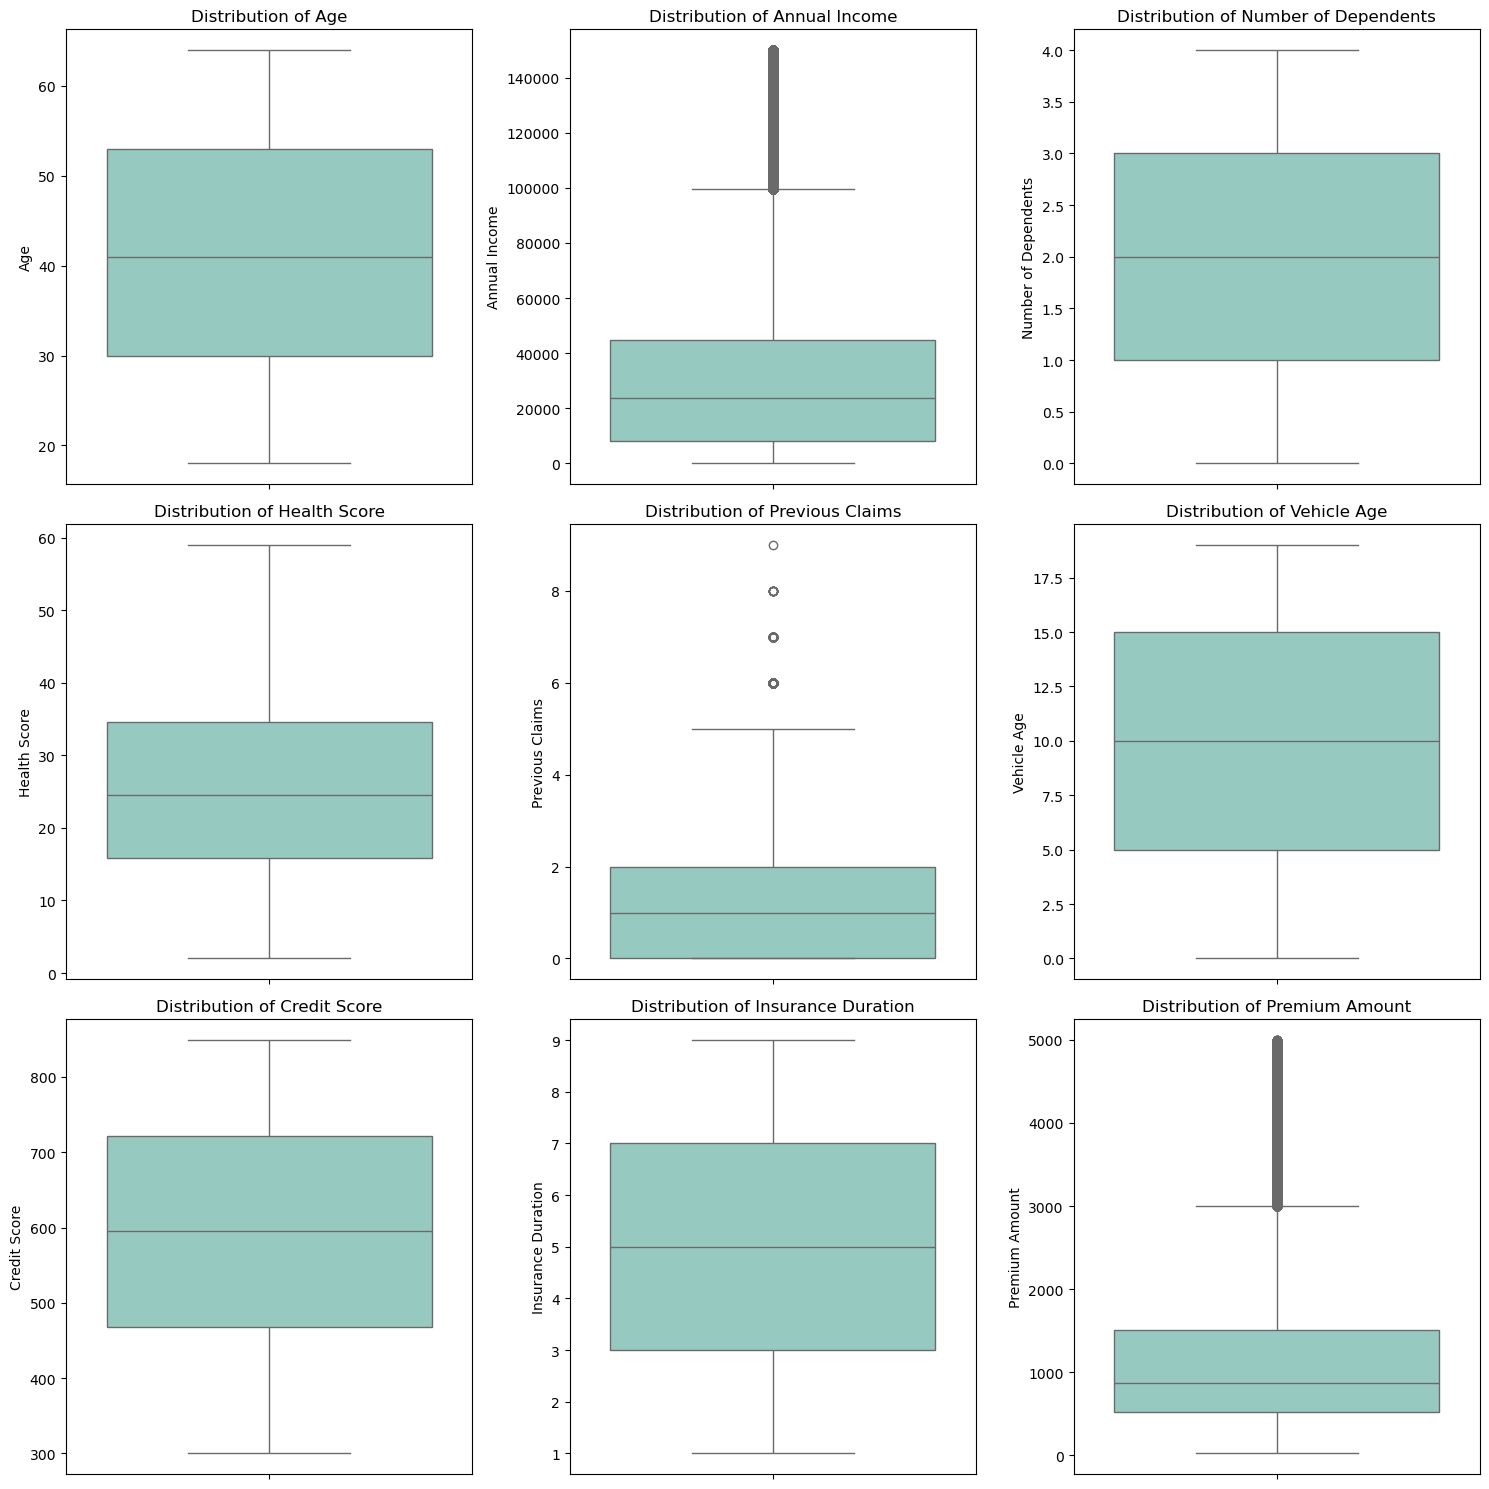

In [18]:
plt.figure(figsize=(15, 15))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)

    sns.boxplot(df[col], palette='Set3')

    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

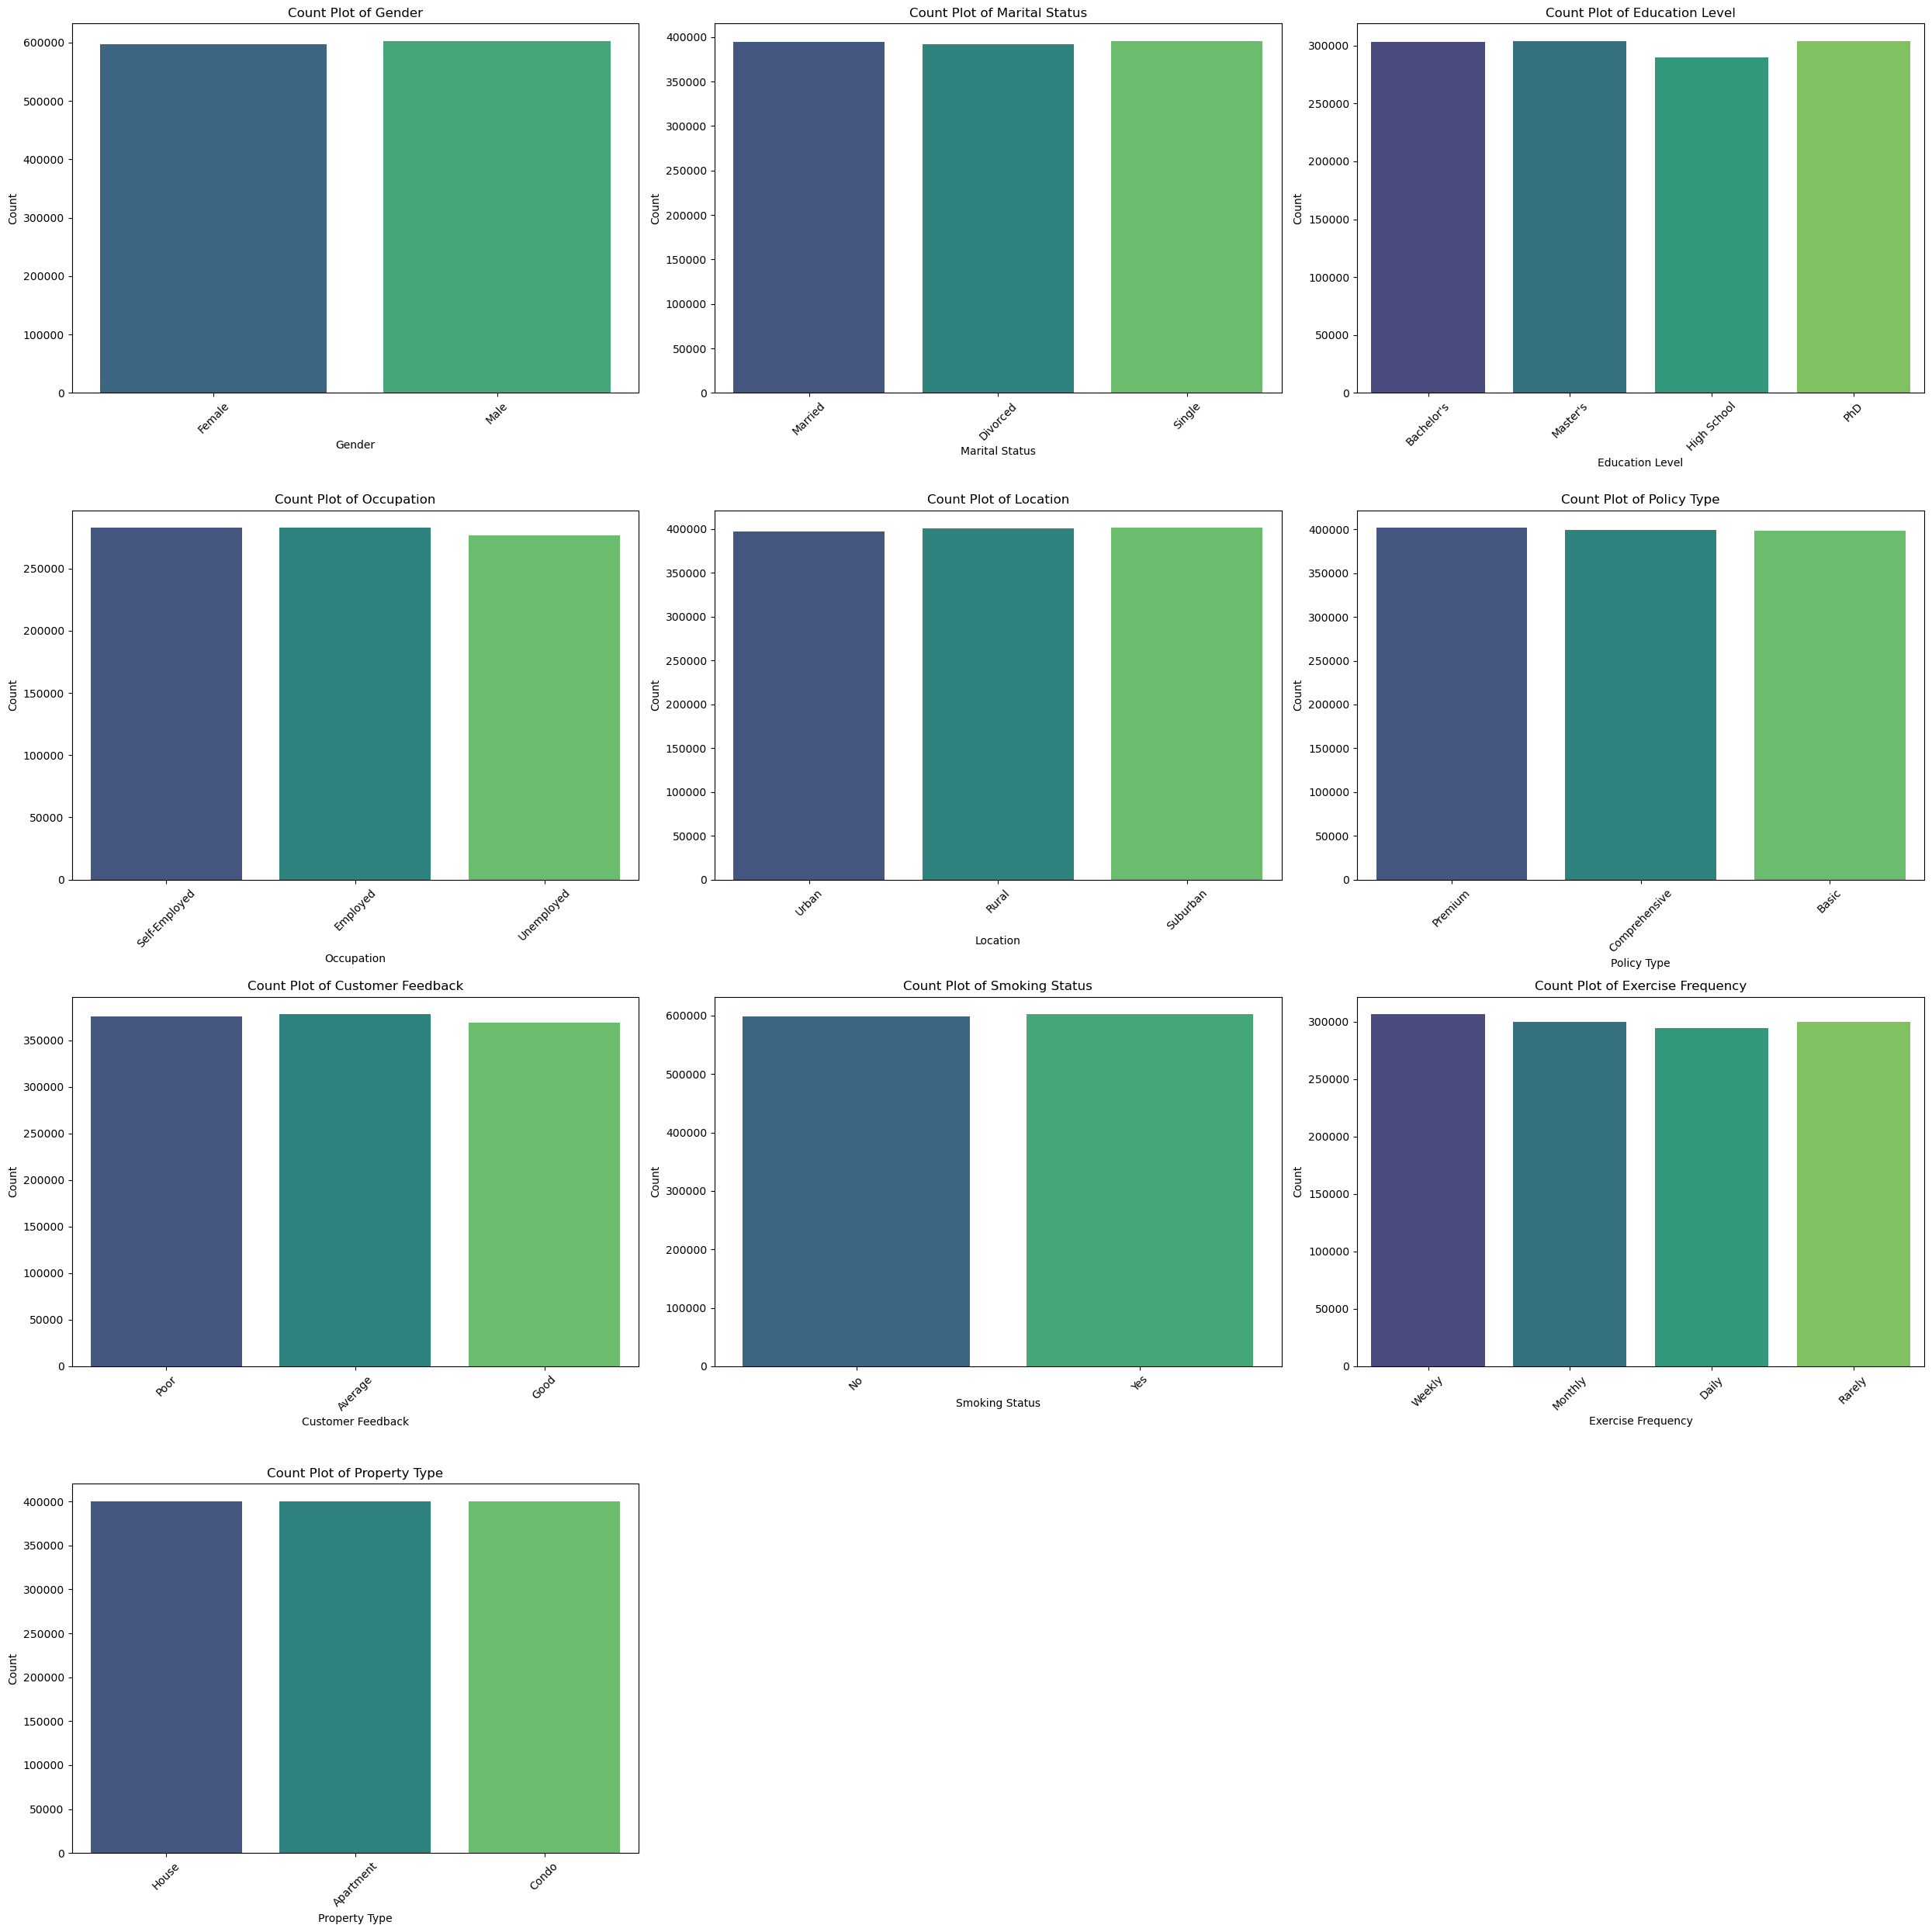

In [19]:
plt.figure(figsize=(25, 25))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(4, 3, i)

    sns.countplot(data=df, x=col, palette='viridis')

    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Bivariate Analysis

In the bivariate analysis, we’ll focus on understanding the relationship between the individual features and the target variable, Premium Amount.

In [20]:
# corr_matrix = num_cols.corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title('Correlation Matrix')
# plt.show()

In [21]:
# plt.figure(figsize=(25, 25))

# for i, col in enumerate(cat_cols, 1):
#     plt.subplot(4, 3, i)
#     sns.boxplot(x=df[col], y=df['Premium Amount'], palette='Set3')
#     plt.title(f'{col} vs Premium Amount')
#     plt.xlabel(col)
#     plt.ylabel('Premium Amount')

# plt.tight_layout()
# plt.show()

### Preprocessing

In [22]:
df['Start Year'] = df['Policy Start Date'].dt.year
df['Start Month'] = df['Policy Start Date'].dt.month
df['Start Day'] = df['Policy Start Date'].dt.day

df.drop(columns=['Policy Start Date'], inplace=True)
df

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,...,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Start Year,Start Month,Start Day
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,...,372.0,5.0,Poor,No,Weekly,House,2869.0,2023,12,23
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,...,694.0,2.0,Average,Yes,Monthly,House,1483.0,2023,6,12
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,...,NaN,3.0,Good,Yes,Weekly,House,567.0,2023,9,30
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,...,367.0,1.0,Poor,Yes,Daily,Apartment,765.0,2024,6,12
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,...,598.0,4.0,Poor,Yes,Weekly,House,2022.0,2021,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,36.0,Female,27316.0,Married,0.0,Master's,Unemployed,13.772907,Urban,Premium,...,372.0,3.0,Poor,No,Daily,Apartment,1303.0,2023,5,3
1199996,54.0,Male,35786.0,Divorced,NaN,Master's,Self-Employed,11.483482,Rural,Comprehensive,...,597.0,4.0,Poor,No,Weekly,Apartment,821.0,2022,9,10
1199997,19.0,Male,51884.0,Divorced,0.0,Master's,NaN,14.724469,Suburban,Basic,...,NaN,6.0,Good,No,Monthly,Condo,371.0,2021,5,25
1199998,55.0,Male,NaN,Single,1.0,PhD,NaN,18.547381,Suburban,Premium,...,407.0,4.0,Poor,No,Daily,Apartment,596.0,2021,9,19


In [23]:
for col in num_cols.columns:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True) 

for col in cat_cols.columns:
    df[col].fillna('unknown', inplace=True)

df.isnull().sum()

Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
Start Year              0
Start Month             0
Start Day               0
dtype: int64

In [24]:
df

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,...,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Start Year,Start Month,Start Day
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,...,372.0,5.0,Poor,No,Weekly,House,2869.0,2023,12,23
1,39.0,Female,31678.0,Divorced,3.0,Master's,unknown,15.569731,Rural,Comprehensive,...,694.0,2.0,Average,Yes,Monthly,House,1483.0,2023,6,12
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,...,595.0,3.0,Good,Yes,Weekly,House,567.0,2023,9,30
3,21.0,Male,141855.0,Married,2.0,Bachelor's,unknown,10.938144,Rural,Basic,...,367.0,1.0,Poor,Yes,Daily,Apartment,765.0,2024,6,12
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,...,598.0,4.0,Poor,Yes,Weekly,House,2022.0,2021,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,36.0,Female,27316.0,Married,0.0,Master's,Unemployed,13.772907,Urban,Premium,...,372.0,3.0,Poor,No,Daily,Apartment,1303.0,2023,5,3
1199996,54.0,Male,35786.0,Divorced,2.0,Master's,Self-Employed,11.483482,Rural,Comprehensive,...,597.0,4.0,Poor,No,Weekly,Apartment,821.0,2022,9,10
1199997,19.0,Male,51884.0,Divorced,0.0,Master's,unknown,14.724469,Suburban,Basic,...,595.0,6.0,Good,No,Monthly,Condo,371.0,2021,5,25
1199998,55.0,Male,23911.0,Single,1.0,PhD,unknown,18.547381,Suburban,Premium,...,407.0,4.0,Poor,No,Daily,Apartment,596.0,2021,9,19


### Feature Engineering

In [25]:
X = df.drop(columns=['Premium Amount'])
y = df['Premium Amount']   

In [26]:
from sklearn.preprocessing import LabelEncoder

X = pd.get_dummies(X, drop_first=True)

In [27]:
y = y.astype(float)

In [28]:
# from sklearn.feature_selection import SelectKBest,f_regression

# # Select top 10 features using ANOVA F-test
# selector = SelectKBest(score_func=f_regression, k=10)
# X_new = selector.fit_transform(X_encoded, y)

# feature_scores = selector.scores_
# selected_features = X_encoded.columns[selector.get_support()] 

# best_features = pd.DataFrame({'Feature': selected_features, 'Score': feature_scores[selector.get_support()]})
# print(best_features.sort_values(by="Score", ascending=False))

In [29]:
# plt.figure(figsize=(10, 6))
# sns.barplot(data=best_features, x='Score', y='Feature', palette='viridis')
# plt.title('Top 10 Features Selected by SelectKBest')
# plt.xlabel('ANOVA F-Score')
# plt.ylabel('Feature')
# plt.tight_layout()
# plt.show()

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [31]:
! pip install shap

In [32]:
import shap

# Convert the DataFrame to a NumPy array
explainer = shap.Explainer(model, X)
shap_values = explainer(X)
# shap.summary_plot(shap_values, X_array)

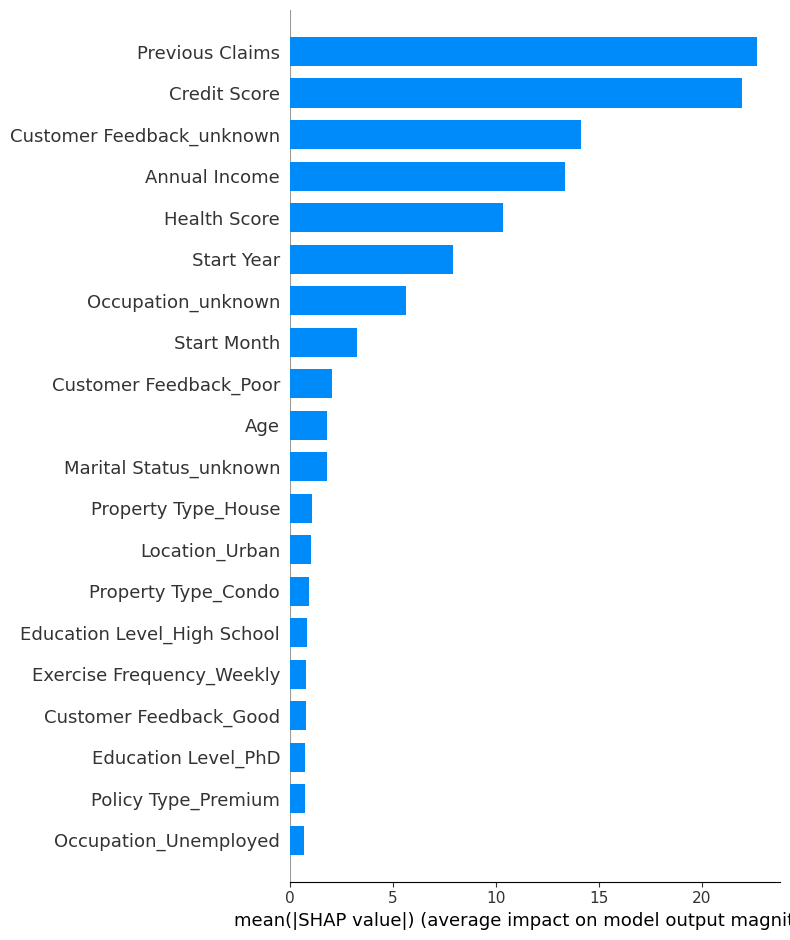

In [33]:
shap.summary_plot(shap_values, feature_names=X.columns, plot_type="bar")

In [34]:
feature_importance = np.abs(shap_values.values).mean(axis=0)
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'SHAP Importance': feature_importance
})

# Sort features by importance
importance_df.sort_values(by='SHAP Importance', ascending=False, inplace=True)
print(importance_df)

                        Feature SHAP Importance
4               Previous Claims       22.673741
6                  Credit Score       21.970635
27    Customer Feedback_unknown       14.148579
1                 Annual Income       13.357223
3                  Health Score        10.32944
8                    Start Year        7.929117
20           Occupation_unknown        5.653436
9                   Start Month        3.242212
26       Customer Feedback_Poor        2.056504
0                           Age        1.826365
14       Marital Status_unknown        1.825551
33          Property Type_House        1.090343
22               Location_Urban        1.009642
32          Property Type_Condo        0.912007
15  Education Level_High School        0.854302
31    Exercise Frequency_Weekly        0.803285
25       Customer Feedback_Good        0.787782
17          Education Level_PhD        0.753809
24          Policy Type_Premium        0.749084
19        Occupation_Unemployed        0

In [35]:
selected_features = importance_df['Feature'][:10]  # Select top 10 features
X_selected = X[selected_features]